In [1]:
import os
import cv2
from sklearn.model_selection import train_test_split

In [2]:
source_dir_1 = '/kaggle/input/animals-detection-images-dataset/train'
source_dir_2 = '/kaggle/input/animals-detection-images-dataset/test'
dest_dir = '/kaggle/working/animal-dataset'
size = (224, 224)

os.mkdir(dest_dir)

In [8]:
for subdir in os.listdir(source_dir_1):
    subdir_path = os.path.join(dest_dir, subdir)
    # print(subdir_path)
    os.makedirs(subdir_path, exist_ok=True)

    source_subdir_path_1 = os.path.join(source_dir_1, subdir)
    for file in os.listdir(source_subdir_path_1):
        source_path = os.path.join(source_subdir_path_1, file)
        dest_path = os.path.join(subdir_path, file)
        if os.path.isfile(source_path) and os.path.splitext(source_path)[1].lower() == '.jpg':
            img = cv2.imread(source_path)
            img = cv2.resize(img, size)
            cv2.imwrite(dest_path, img)

    source_subdir_path_2 = os.path.join(source_dir_2, subdir)
    for file in os.listdir(source_subdir_path_2):
        source_path = os.path.join(source_subdir_path_2, file)
        dest_path = os.path.join(subdir_path, file)
        if os.path.isfile(source_path) and os.path.splitext(source_path)[1].lower() == '.jpg':
            img = cv2.imread(source_path)
            img = cv2.resize(img, size)
            cv2.imwrite(dest_path, img)

In [11]:
src_dir = '/kaggle/working/animal-dataset'
dst_dir = '/kaggle/working/animal-dataset-detection'

train_ratio = 0.65
test_ratio = 0.35

train_dir = os.path.join(dst_dir, 'train')
test_dir = os.path.join(dst_dir, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [10]:
import os
import shutil

# create a zip archive of the folder
shutil.make_archive('my_folder', 'zip', root_dir='/kaggle/working/animal-dataset')

# download the zip archive
from IPython.display import FileLink
FileLink(r'my_folder.zip')

/kaggle/working/my_folder.zip

In [13]:
import random

for subdir in os.listdir(src_dir):
    subdir_path = os.path.join(src_dir, subdir)
    if not os.path.isdir(subdir_path):
        continue
    
    # create train and test subdirectories in destination directory
    train_subdir = os.path.join(train_dir, subdir)
    test_subdir = os.path.join(test_dir, subdir)
    os.makedirs(train_subdir, exist_ok=True)
    os.makedirs(test_subdir, exist_ok=True)
    
    # split files in subdirectory into train and test sets
    file_names = os.listdir(subdir_path)
    train_names, test_names = train_test_split(file_names, test_size=0.25, random_state=42)
    
    # move train files to train subdirectory
    for name in train_names:
        src_file = os.path.join(subdir_path, name)
        dst_file = os.path.join(train_subdir, name)
        shutil.copy(src_file, dst_file)
    
    # move test files to test subdirectory
    for name in test_names:
        src_file = os.path.join(subdir_path, name)
        dst_file = os.path.join(test_subdir, name)
        shutil.copy(src_file, dst_file)

In [1]:
import os
import tensorflow
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd

In [3]:
train_data_dir = '/kaggle/input/datasetanimal/train'
test_data_dir = '/kaggle/input/datasetanimal/test'

train_image_data_generator = ImageDataGenerator(rescale=1.0 / 255, zoom_range=0.1, rotation_range=0.1, horizontal_flip=True)
test_image_data_generator = ImageDataGenerator(rescale=1.0 / 255)

train_datagen = train_image_data_generator.flow_from_directory(train_data_dir)
test_datagen = test_image_data_generator.flow_from_directory(test_data_dir)

Found 21774 images belonging to 80 classes.
Found 7297 images belonging to 80 classes.


<AxesSubplot:>

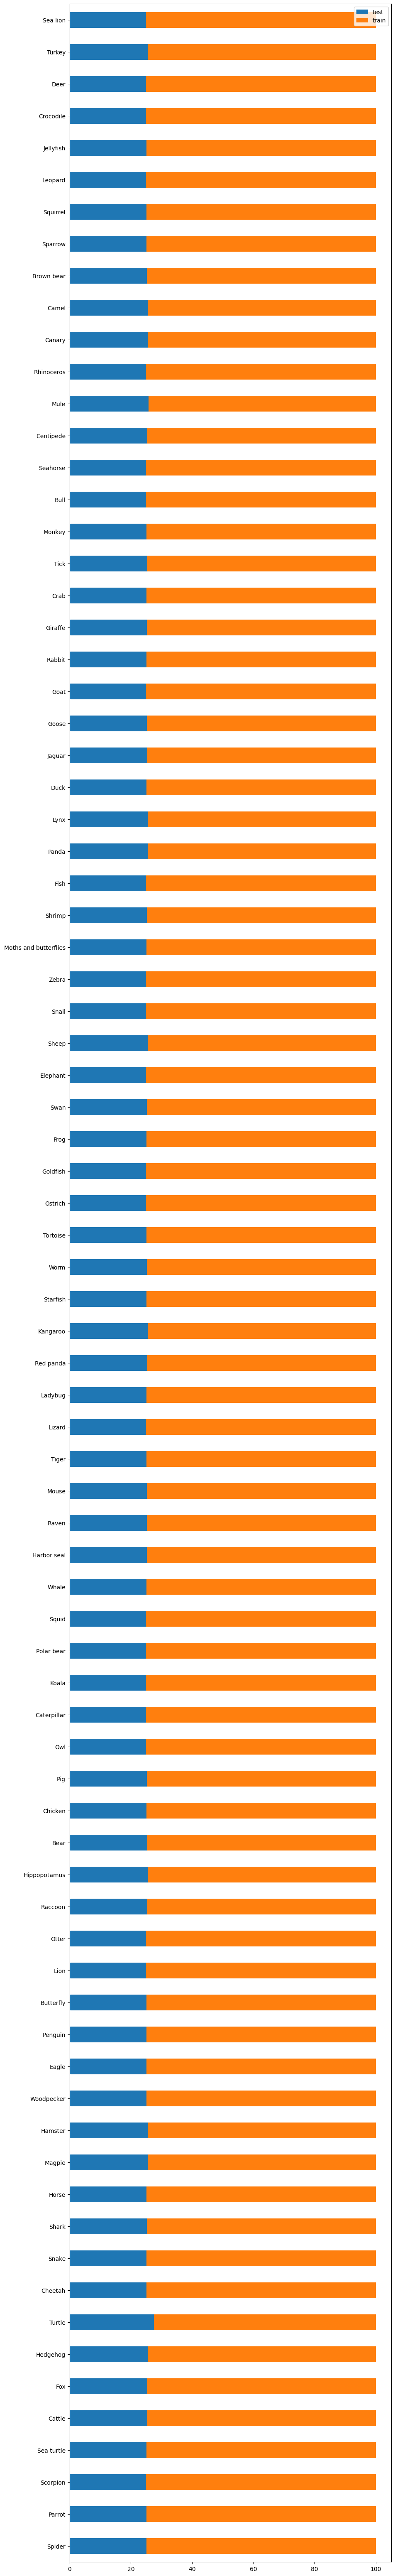

In [4]:
class_names = os.listdir(train_data_dir)

animal_values = []
test_values = []
train_values = []

for name in class_names:
    test_subdirectory_path = os.path.join(test_data_dir, name)
    train_subdirectory_path = os.path.join(train_data_dir, name)
    test_image_count, train_image_count = len(os.listdir(test_subdirectory_path)), len(
        os.listdir(train_subdirectory_path)
    )
    total_image_count = train_image_count + test_image_count
    test_percent = round((test_image_count / total_image_count) * 100, 2)
    train_percent = round((train_image_count / total_image_count) * 100, 2)

    # Update the lists with appropriate values
    animal_values.append(name)
    test_values.append(test_percent)
    train_values.append(train_percent)

# Create a Pandas Dataframe
df = pd.DataFrame({"test": test_values, "train": train_values}, index=animal_values)

# Plot the data
df.plot(
    kind="barh",
    stacked=True,
    figsize=(
        10,
        80,
    ),
)

In [9]:
for name in class_names:
    test_subdirectory_path = os.path.join(test_data_dir, name)
    train_subdirectory_path = os.path.join(train_data_dir, name)
    test_image_count, train_image_count = len(os.listdir(test_subdirectory_path)), len(os.listdir(train_subdirectory_path))

    # Update the lists with appropriate values
    animal_values.append(name)
    test_values.append(test_image_count)
    train_values.append(train_image_count)

# Create a Pandas Dataframe
df = pd.DataFrame({"test": test_values, "train": train_values}, index=animal_values)

# Plot the data
df.plot(kind="bar", legend=True, figsize=(20,50), title="Image Counts in Each Class");

**Model Creating**

In [1]:
import tensorflow as tf
import numpy as np
import scipy.misc
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions, ResNet50V2
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.python.framework.ops import EagerTensor
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

In [12]:
def identity_block(X, f, filters, initializer=random_uniform):
    
    F1, F2, F3 = filters
    
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = 1, strides = (1,1), padding = 'valid', kernel_initializer = initializer(seed=0))(X)
    X = BatchNormalization()(X) 
    X = Activation('relu')(X)
    
    ## Second component of main path
    X = Conv2D(filters = F2, kernel_size = f, strides = (1,1), padding = 'same', kernel_initializer = initializer(seed=0))(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)

    ## Third component of main path
    X = Conv2D(filters = F3, kernel_size = 1, strides = (1,1), padding = 'valid', kernel_initializer = initializer(seed=0))(X)
    X = BatchNormalization(axis = 3)(X)
    
    ## Final step:
    X =  Add()([X_shortcut,X])
    X =  Activation('relu')(X)

    return X

def convolutional_block(X, f, filters, s = 2, initializer=glorot_uniform):
    
    F1, F2, F3 = filters

    X_shortcut = X

    # First component of main path glorot_uniform(seed=0)
    X = Conv2D(filters = F1, kernel_size = 1, strides = (s, s), padding='valid', kernel_initializer = initializer(seed=0))(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)

    # Second component of main path 
    X = Conv2D(filters =F2,  kernel_size = f, strides = (1,1), padding = 'same', kernel_initializer = initializer(seed=0))(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)

    # Third component of main path 
    X = Conv2D(filters=F3, kernel_size = 1, strides = (1,1), padding = 'valid', kernel_initializer = initializer(seed=0))(X)
    X = BatchNormalization()(X)

    ##### SHORTCUT PATH #### 
    X_shortcut = Conv2D(filters= F3,kernel_size = 1 , strides = (s,s), padding = 'valid', kernel_initializer = initializer(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization()(X_shortcut)

    # Final step
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X) 
    
    return X

In [19]:
def BenchmarkModel(input_shape = (64, 64, 3), classes = 6):

    X_input = Input(input_shape)

    
    # Zero-Padding
    
    X = ZeroPadding2D((3, 3))(X_input)
    # Stage 1
    
    X = Conv2D(64, (7, 7), strides = (2, 2), kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], s = 1)
    X = identity_block(X, 3, [64, 64, 256])
    X = identity_block(X, 3, [64, 64, 256])
    
    ## Stage 3
    X = convolutional_block(X, f=3, filters=[128, 128, 512], s=2)
    X = identity_block(X, 3, [128, 128, 512])
    X = identity_block(X, 3, [128, 128, 512])
    X = identity_block(X, 3, [128, 128, 512])
    
    ## Stage 4
    X = convolutional_block(X, f=3,filters= [256, 256, 1024], s=2)
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    
    ## Stage 5
    X = convolutional_block(X, f=3, filters=[512, 512, 2048], s=2)
    X = identity_block(X, 3, [512, 512, 2048])
    X = identity_block(X, 3, [512, 512, 2048]) 
    X = AveragePooling2D((2, 2), name='avg_pool')(X)
    
    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', kernel_initializer = glorot_uniform(seed=0))(X)
    
    # Create model
    model = Model(inputs = X_input, outputs = X)

In [20]:
model = BenchmarkModel(input_shape = (224, 224, 3), classes = 80, weight_decay = 0.01)
print(model.summary())
opt = tf.keras.optimizers.Adam(learning_rate = 0.003)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_115 (Conv2D)            (None, 112, 112, 64  832         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_113 (Batch  (None, 112, 112, 64  256        ['conv2d_115[0][0]']             
 Normalization)                 )                                                           

In [2]:
train_datagen = ImageDataGenerator(
        rescale=1./255.0,
       # rotation_range=20,
        width_shift_range=0.2,
       # height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
       # brightness_range=[0.7, 1.3],
        fill_mode="nearest",
        validation_split=0.3)
test_datagen = ImageDataGenerator(rescale=1./ 255.0)

In [3]:
train_path = '/kaggle/input/datasetanimal/train'
test_path = '//kaggle/input/datasetanimal/test'

train_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=64,
    # class_mode="categorical",
    subset='training',
    shuffle=True,
)

valid_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=64,
    # class_mode="categorical",
    subset='validation',
    shuffle=True,
)

test_generator = test_datagen.flow_from_directory(
    directory=test_path,
    target_size=(224, 224),
    color_mode="rgb",
    # batch_size=1,
    # class_mode=None,
    shuffle=False,
)

Found 15277 images belonging to 80 classes.
Found 6497 images belonging to 80 classes.
Found 7297 images belonging to 80 classes.


In [4]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience = 8,
    min_delta = 0.001,
    mode='max'
)

In [ ]:
batch_size = 64

value = model.fit(
    train_generator,
    validation_data = valid_generator,
    steps_per_epoch = 150, # train_generator.samples // batch_size,
    validation_steps = valid_generator.samples // batch_size,
    batch_size = batch_size,
    epochs = 50,
#     callbacks=[early_stopping]
)


In [ ]:
model.save('/kaggle/working/model_res.h5')

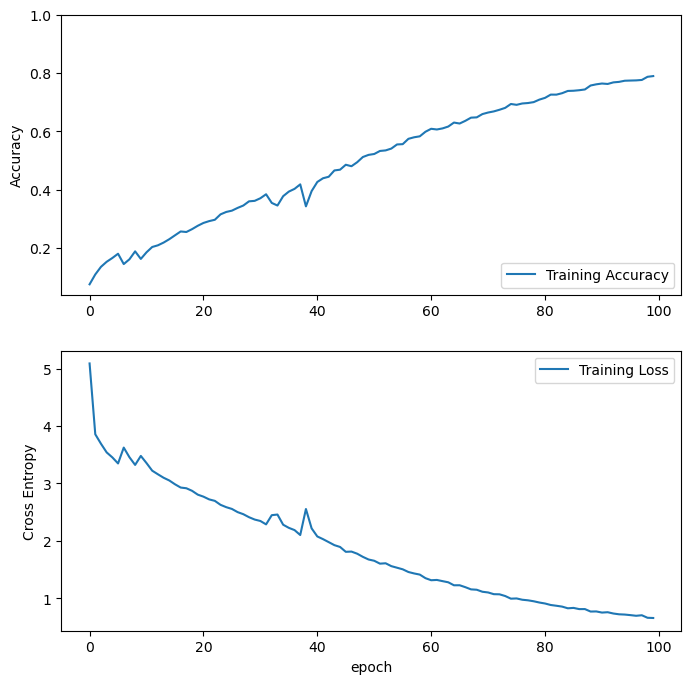

In [ ]:
acc = value.history['accuracy']
loss = value.history['loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')

plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])

plt.xlabel('epoch')
plt.show()

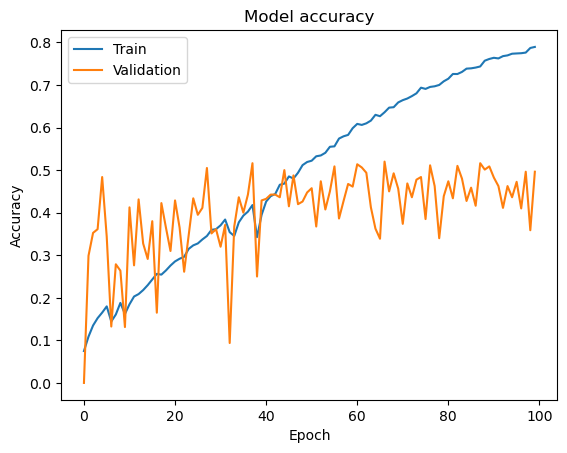

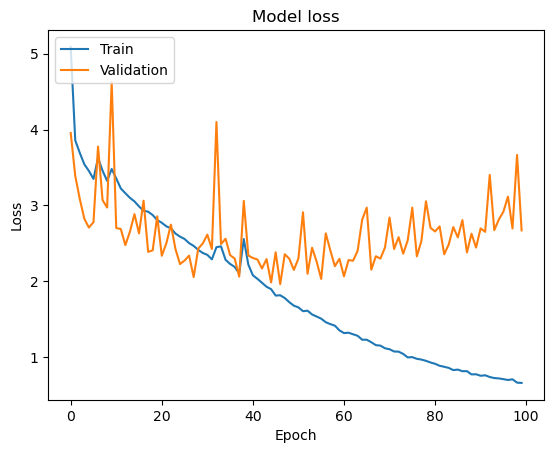

In [ ]:
plt.plot(value.history['accuracy'])
plt.plot(value.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('acc.png')
plt.show()

# Plot the loss and validation loss over epochs
plt.plot(value.history['loss'])
plt.plot(value.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png')
plt.show()

In [ ]:
plt.savefig('accuracy.png')

# Download the plot
import urllib.request
urllib.request.urlretrieve('accuracy.png', '/kaggle/working/my_plot.png')

In [ ]:
def BenchmarkModel(input_shape = (224, 224, 3), classes = 6, weight_decay = 0.01):

    X_input = Input(input_shape)

    # Stage 1
    
    X = Conv2D(64, (2, 2), strides = (2, 2), kernel_regularizer=l2(weight_decay))(X_input)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
#     X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], s=1, weight_decay = weight_decay)
    X = identity_block(X, 3, [64, 64, 256], weight_decay = weight_decay)
    X = identity_block(X, 3, [64, 64, 256], weight_decay = weight_decay)
#     X = MaxPooling2D((2, 2), strides=(2, 2))(X)
    
    ## Stage 3
    X = convolutional_block(X, f=3, filters=[128, 128, 512], s=2, weight_decay = weight_decay)
    X = identity_block(X, 3, [128, 128, 512], weight_decay = weight_decay)
    X = identity_block(X, 3, [128, 128, 512], weight_decay = weight_decay)
#     X = identity_block(X, 3, [128, 128, 512])
    X = MaxPooling2D((2, 2), strides=(2, 2))(X)
    
    ## Stage 4
    X = convolutional_block(X, f=3,filters= [256, 256, 1024], s=2, weight_decay = weight_decay)
    X = identity_block(X, 3, [256, 256, 1024], weight_decay = weight_decay)
    X = identity_block(X, 3, [256, 256, 1024], weight_decay = weight_decay)
    # X = identity_block(X, 3, [256, 256, 1024])
    # X = identity_block(X, 3, [256, 256, 1024])
    # X = identity_block(X, 3, [256, 256, 1024])
    X = MaxPooling2D((2, 2), strides=(2, 2))(X)
    
    ## Stage 5
    # X = convolutional_block(X, f=3, filters=[512, 512, 2048], s=2, weight_decay = weight_decay)
    # X = identity_block(X, 3, [512, 512, 2048], weight_decay = weight_decay)
    # X = identity_block(X, 3, [512, 512, 2048], weight_decay = weight_decay) 
    # X = MaxPooling2D((2, 2), strides=(2, 2))(X)
    
    # output layer
    X = Flatten()(X)
    X = Dropout(0.3)(X)
    X = Dense(classes, activation='softmax', kernel_initializer = glorot_uniform(seed=0))(X)
    
    # Create model
    model = Model(inputs = X_input, outputs = X)

    return model

In [ ]:
model_res = BenchmarkModel(input_shape = (224, 224, 3), classes = 80, weight_decay = 0.01)
opt = tf.keras.optimizers.SGD(learning_rate = 0.002)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model_res.fit(train_generator,
                validation_data = valid_generator,
                epochs = 50,
                steps_per_epoch=200,
                validation_steps=valid_generator.samples//64)

Epoch 1/50
200/200 [==============================] - 382s 2s/step - loss: 2.4186 - accuracy: 0.4726 - val_loss: 1.7298 - val_accuracy: 0.5729
Epoch 2/50
200/200 [==============================] - 327s 2s/step - loss: 1.4098 - accuracy: 0.6312 - val_loss: 1.5342 - val_accuracy: 0.6122
Epoch 3/50
200/200 [==============================] - 321s 2s/step - loss: 1.1967 - accuracy: 0.6744 - val_loss: 1.3980 - val_accuracy: 0.6490
Epoch 4/50
200/200 [==============================] - 319s 2s/step - loss: 1.0553 - accuracy: 0.6987 - val_loss: 1.3737 - val_accuracy: 0.6481
Epoch 5/50
200/200 [==============================] - 320s 2s/step - loss: 0.9558 - accuracy: 0.7227 - val_loss: 1.3236 - val_accuracy: 0.6567
Epoch 6/50
200/200 [==============================] - 319s 2s/step - loss: 0.9098 - accuracy: 0.7327 - val_loss: 1.3404 - val_accuracy: 0.6544
Epoch 7/50
200/200 [==============================] - 321s 2s/step - loss: 0.8690 - accuracy: 0.7382 - val_loss: 1.3490 - val_accuracy: 0.6575

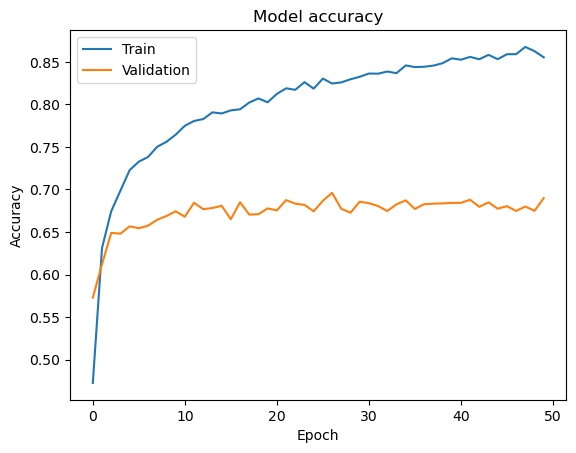

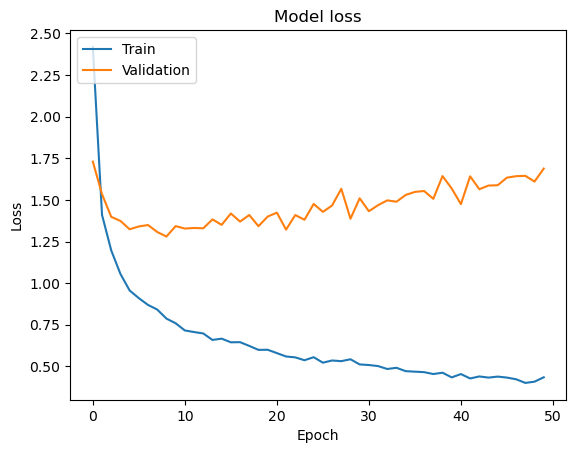

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('acc.png')
plt.show()

# Plot the loss and validation loss over epochs
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png')
plt.show()

In [ ]:
test_loss, test_acc = model_res.evaluate(test_generator)
print(test_acc)

229/229 [==============================] - 23s 99ms/step - loss: 1.5136 - accuracy: 0.7148
0.714814305305481


In [ ]:
print(test_loss)

1.5136076211929321


In [ ]:
model_res.save('/kaggle/working/model_resnet.h5')

In [ ]:
print(model_res)

In [ ]:
import os
os.chdir(r'/kaggle/working')

In [ ]:
!ls
from IPython.display import FileLink
FileLink(r'cm_res.png')

__notebook_source__.ipynb  cm_res.png


/kaggle/working/cm_res.png

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
model = load_model('/kaggle/input/resnet/model_resnet.h5')

In [ ]:
Y_pred = model.predict(test_generator, len(test_generator))
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
cm = confusion_matrix(y_true, y_pred)

229/229 [==============================] - 25s 107ms/step


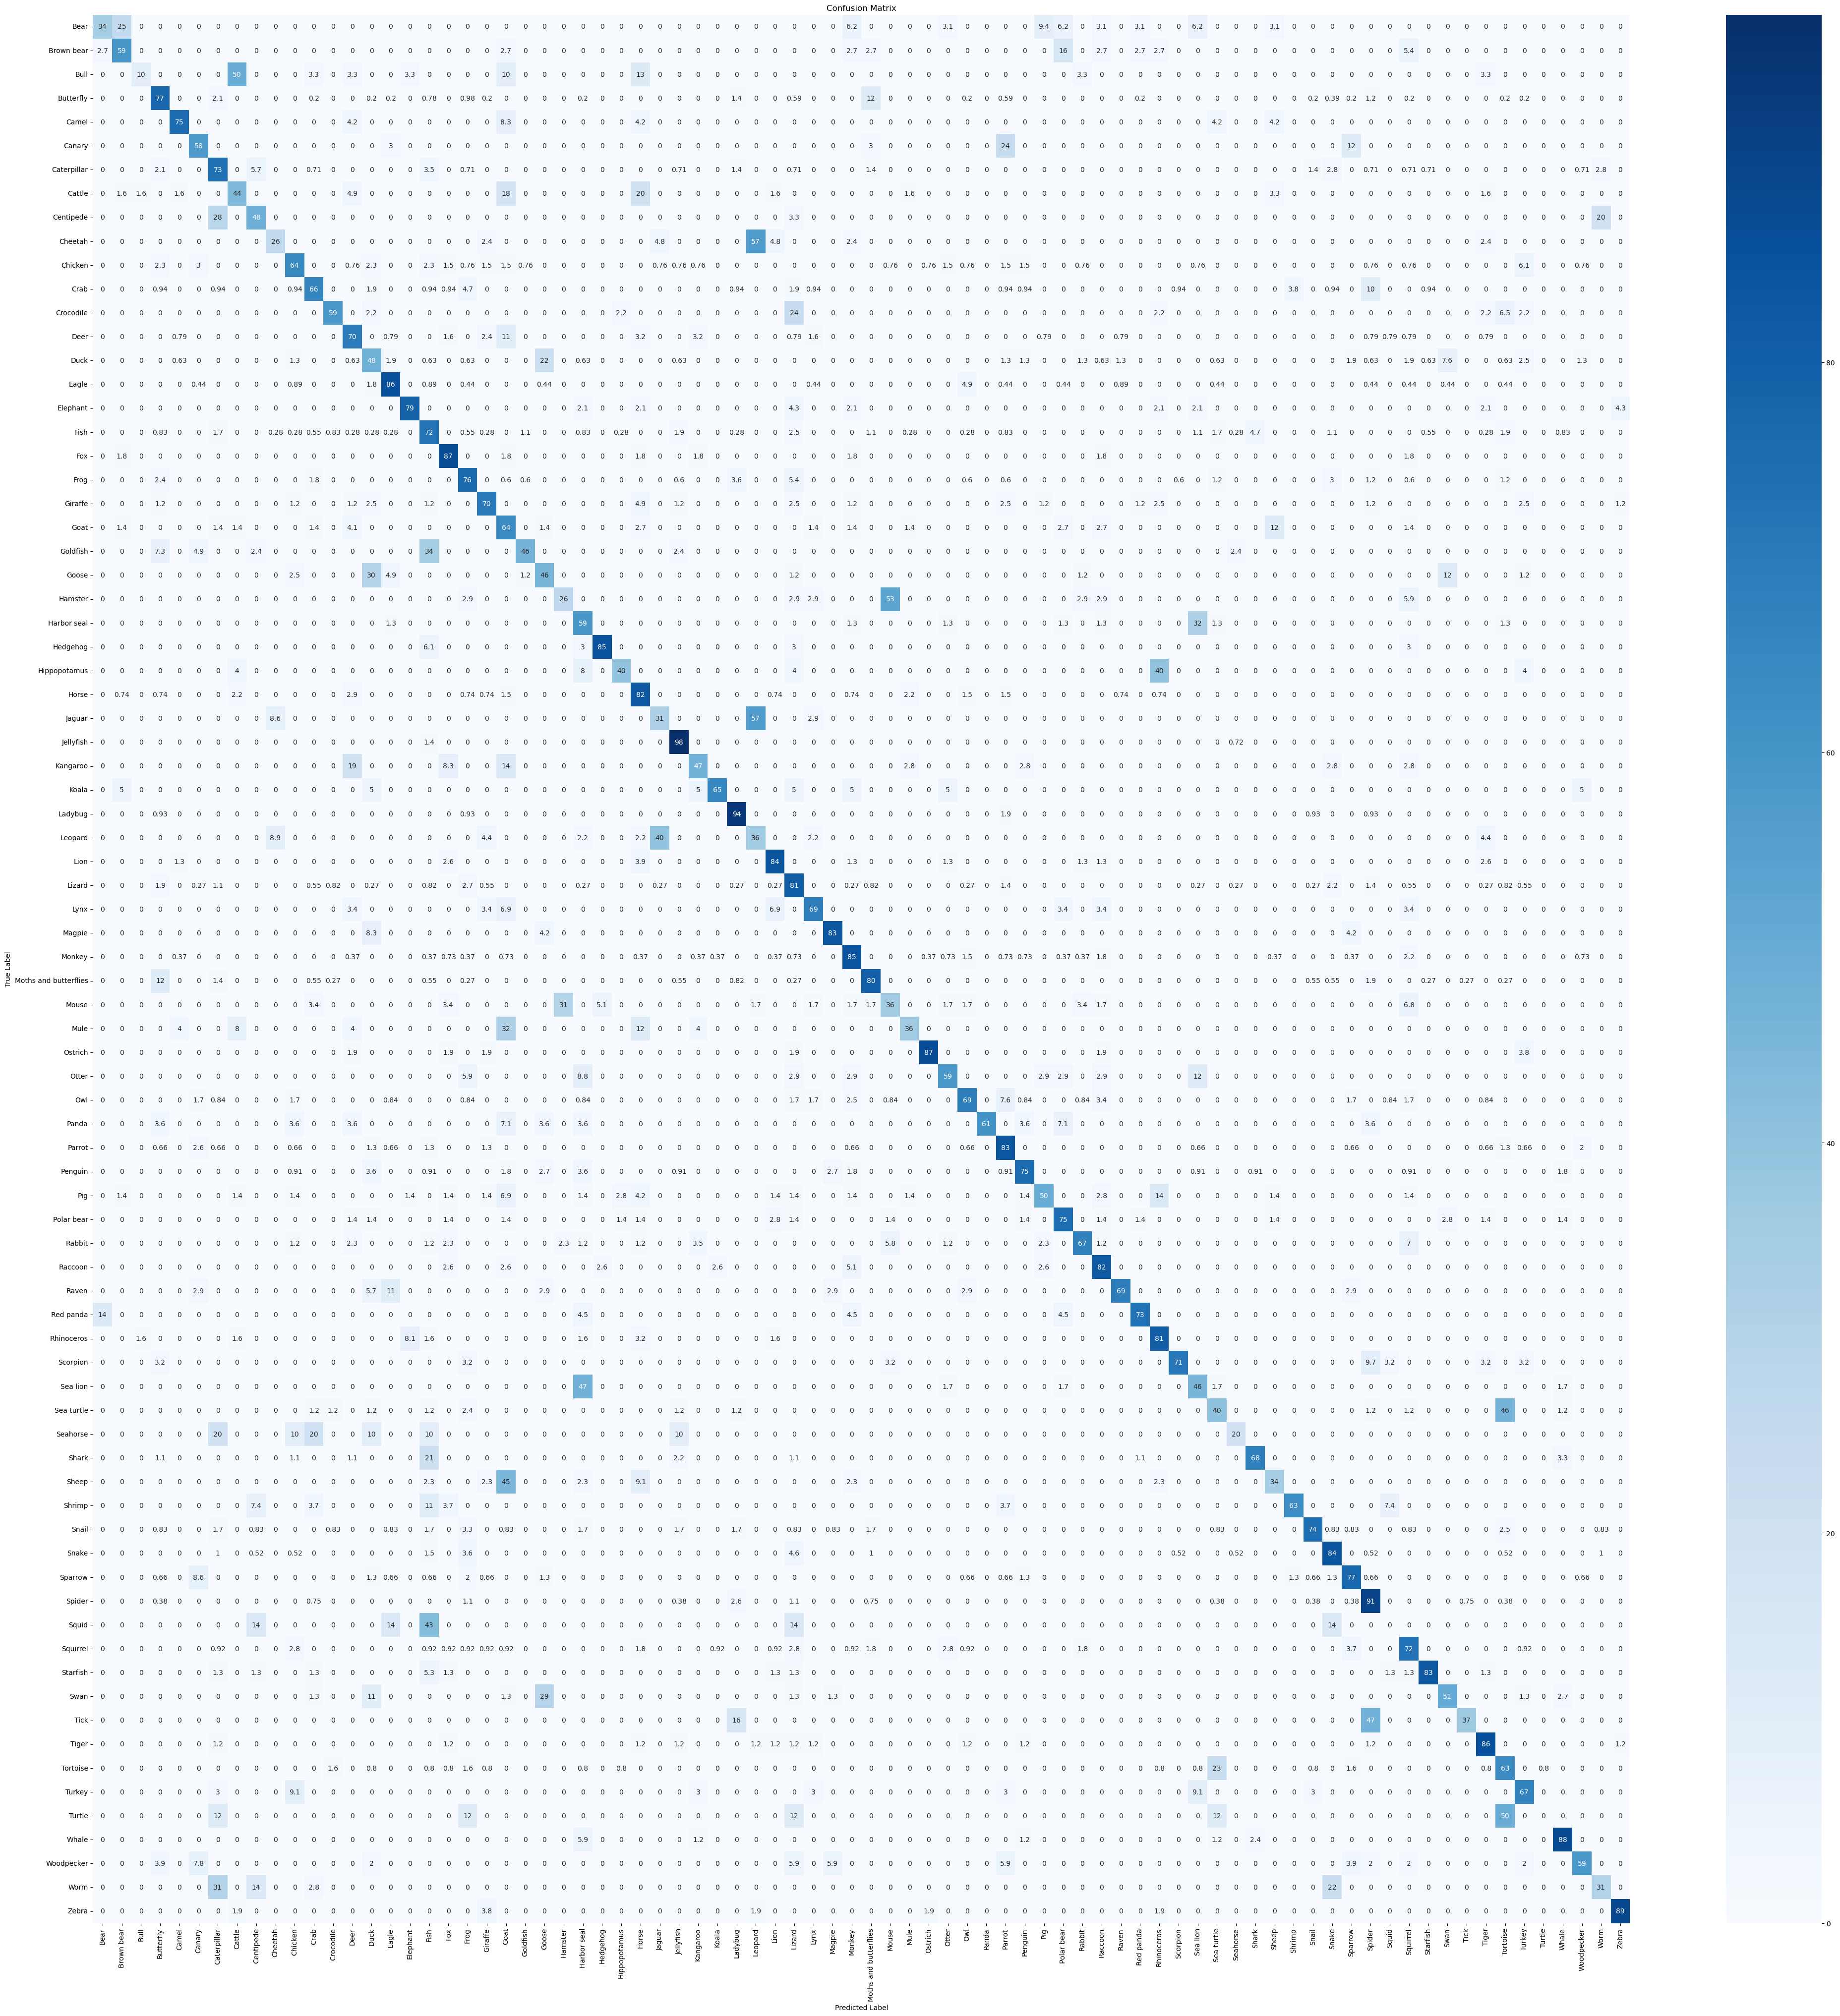

In [ ]:
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100.0

plt.figure(figsize = (50, 50))
sns.heatmap(cm_norm, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('cm_res.png')
plt.show()

In [ ]:
tp = np.diag(cm)
tn = np.sum(cm) - np.sum(cm, axis=0) - np.sum(cm, axis=1) + tp
fp = np.sum(cm, axis=0) - tp
fn = np.sum(cm, axis=1) - tp

# Print the results
print('True positives:', sum(tp))
print('True negatives:', sum(tn))
print('False positives:', sum(fp))
print('False negatives:', sum(fn))

True positives: 5216
True negatives: 574382
False positives: 2081
False negatives: 2081


In [ ]:
all_classes_cm = np.sum(cm, axis=1)
print(all_classes_cm)

[ 32  37  30 512  24  33 141  61  60  42 132 106  46 126 158 225  47 363
  55 167  81  74  41  81  34  76  33  25 136  35 138  36  20 107  45  77
 365  29  24 273 365  59  25  53  34 119  28 151 110  72  71  86  39  35
  22  62  31  59  82  10  91  44  27 121 194 152 266   7 109  76  75  19
  85 125  33   8  85  51  36  53]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_true, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_true, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_true, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_true, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_true, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_true, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_true, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_true, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_true, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_true, y_pred, average='weighted')))


Accuracy: 0.71

Micro Precision: 0.71
Micro Recall: 0.71
Micro F1-score: 0.71

Macro Precision: 0.65
Macro Recall: 0.62
Macro F1-score: 0.63

Weighted Precision: 0.72
Weighted Recall: 0.71
Weighted F1-score: 0.71
